# Aim

Get used to loading Kepler data, and try IDEM.

TBD: IDEM as in Appendix A of Hsu 2018 (https://arxiv.org/pdf/1803.10787.pdf).

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sys
sys.path.append('..')
from dev.completeness import *
from tqdm.notebook import tqdm

%load_ext autoreload
%autoreload 2

In [2]:
stellar = pd.read_hdf('../data/q1_q16_stellar.h5')

In [3]:
stellar

,kepid,tm_designation,teff,teff_err1,teff_err2,logg,logg_err1,logg_err2,feh,feh_err1,...,timeout06p0,timeout07p5,timeout09p0,timeout10p5,timeout12p0,timeout12p5,timeout15p0,timeoutsumry,cdppslplong,cdppslpshrt
0,9770862,2MASS J19274858+4630098,5910,157.0,-163.0,4.367,0.117,-0.240,-0.20,0.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9770895,2MASS J19275096+4630422,5101,155.0,-140.0,4.620,0.045,-0.066,-0.56,0.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9770983,2MASS J19275843+4630578,5977,157.0,-232.0,4.473,0.040,-0.259,0.21,0.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9770992,2MASS J19275926+4631114,4904,107.0,-145.0,2.601,0.338,-0.209,-0.26,0.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9771031,2MASS J19280394+4630130,4860,80.0,-185.0,2.670,0.028,-0.033,0.36,0.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198912,12404283,2MASS J19180241+5113045,4542,179.0,-153.0,4.619,0.027,-0.047,0.14,0.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198913,12404294,2MASS J19180417+5113157,6632,171.0,-204.0,4.038,0.302,-0.230,-0.94,0.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198914,12404305,2MASS J19180507+5114143,5843,155.0,-148.0,4.614,0.024,-0.197,-0.70,0.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198915,12404331,2MASS J19180852+5115371,5632,165.0,-153.0,4.551,0.027,-0.255,-0.02,0.23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
planetary = pd.read_hdf('../data/q1_q16_koi.h5')

In [5]:
# https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html
planetary

,kepid,kepoi_name,kepler_name,ra,ra_err,ra_str,dec,dec_err,dec_str,koi_gmag,...,koi_fpflag_co,koi_fpflag_ec,koi_insol,koi_insol_err1,koi_insol_err2,koi_srho,koi_srho_err1,koi_srho_err2,koi_fittype,koi_score
0,11446443,K00001.01,Kepler-1 b,286.80847,0.0,19h07m14.03s,49.316399,0.0,+49d18m59.0s,11.736,...,0,0,772.22,60.74,-57.15,1.83176,0.00684,-0.00441,MCMC,NaN
1,10666592,K00002.01,Kepler-2 b,292.24728,0.0,19h28m59.35s,47.969521,0.0,+47d58m10.3s,10.935,...,0,0,3973.70,279.95,-264.48,0.40593,0.00006,-0.00027,MCMC,NaN
2,6678383,K00111.02,Kepler-104 A c,287.60461,0.0,19h10m25.11s,42.166779,0.0,+42d10m00.4s,12.956,...,0,0,80.07,37.94,-34.43,0.53388,0.48907,-0.03732,MCMC,NaN
3,6922244,K00010.01,Kepler-8 b,281.28812,0.0,18h45m09.15s,42.451080,0.0,+42d27m03.9s,13.886,...,0,0,1264.67,323.37,-317.46,0.68914,0.01840,-0.01254,MCMC,NaN
4,9873254,K00717.01,Kepler-653 b,282.21292,0.0,18h48m51.10s,46.717819,0.0,+46d43m04.1s,13.866,...,0,0,76.11,46.93,-18.02,4.11287,0.19801,-1.48866,MCMC,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7343,7906882,K00686.01,NaN,296.84076,0.0,19h47m21.78s,43.647121,0.0,+43d38m49.6s,14.123,...,0,0,9.95,12.17,-2.77,8.78697,0.25712,-0.20883,MCMC,NaN
7344,7976520,K00687.01,NaN,297.11713,0.0,19h48m28.11s,43.711430,0.0,+43d42m41.1s,14.278,...,0,0,373.81,432.61,-103.73,4.03390,0.20936,-1.53095,MCMC,NaN
7345,8161561,K00688.01,Kepler-645 b,290.32278,0.0,19h21m17.47s,44.035809,0.0,+44d02m08.9s,14.327,...,0,0,1284.07,2020.99,-532.89,1.07958,0.04374,-0.42376,MCMC,NaN
7346,8361905,K00689.01,Kepler-646 b,290.47134,0.0,19h21m53.12s,44.387081,0.0,+44d23m13.5s,14.273,...,0,0,37.63,53.75,-8.78,1.55906,1.23396,-1.06476,MCMC,NaN


In [6]:
planetary.keys()

Index(['kepid', 'kepoi_name', 'kepler_name', 'ra', 'ra_err', 'ra_str', 'dec',
       'dec_err', 'dec_str', 'koi_gmag',
       ...
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_insol', 'koi_insol_err1',
       'koi_insol_err2', 'koi_srho', 'koi_srho_err1', 'koi_srho_err2',
       'koi_fittype', 'koi_score'],
      dtype='object', length=153)

In [7]:
stellar.keys()

Index(['kepid', 'tm_designation', 'teff', 'teff_err1', 'teff_err2', 'logg',
       'logg_err1', 'logg_err2', 'feh', 'feh_err1', 'feh_err2', 'mass',
       'mass_err1', 'mass_err2', 'radius', 'radius_err1', 'radius_err2',
       'dens', 'dens_err1', 'dens_err2', 'prov_sec', 'kepmag',
       'limbdark_coeff1', 'limbdark_coeff2', 'limbdark_coeff3',
       'limbdark_coeff4', 'dist', 'dist_err1', 'dist_err2', 'nconfp', 'nkoi',
       'ntce', 'datalink_dvr', 'st_delivname', 'st_vet_date_str', 'ra', 'dec',
       'st_quarters', 'teff_prov', 'logg_prov', 'feh_prov', 'jmag', 'jmag_err',
       'hmag', 'hmag_err', 'kmag', 'kmag_err', 'dutycycle', 'dataspan',
       'mesthres01p5', 'mesthres02p0', 'mesthres02p5', 'mesthres03p0',
       'mesthres03p5', 'mesthres04p5', 'mesthres05p0', 'mesthres06p0',
       'mesthres07p5', 'mesthres09p0', 'mesthres10p5', 'mesthres12p0',
       'mesthres12p5', 'mesthres15p0', 'rrmscdpp01p5', 'rrmscdpp02p0',
       'rrmscdpp02p5', 'rrmscdpp03p0', 'rrmscdpp03p5', 'rrm

In [8]:
planetary = planetary[np.isfinite(planetary['koi_prad'])]

(array([  1.,   0.,   0.,   0.,   1.,   1.,   4.,   6.,   8.,  23.,  51.,
        101., 136., 233., 297., 378., 485., 495., 515., 511., 478., 450.,
        344., 219., 128., 113., 107.,  86.,  63.,  85.,  55.,  66.,  69.,
         63.,  70.,  55.,  61.,  71.,  89.,  84., 108.,  99., 108., 102.,
         95.,  91.,  56.,  58.,  40.,  39.,  18.,  23.,  22.,  13.,  20.,
         10.,  15.,   9.,   8.,   5.,   5.,   9.,   5.,   2.,   7.,   5.,
          4.,   2.,   1.,   6.,   5.,   5.,   2.,   5.,   5.,   1.,   5.,
          7.,   3.,   6.,   7.,   6.,   3.,   4.,   1.,   3.,   0.,   1.,
          2.,   0.,   2.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,
          1.]),
 array([-1.96611286, -1.8304551 , -1.69479735, -1.55913959, -1.42348184,
        -1.28782408, -1.15216633, -1.01650857, -0.88085082, -0.74519306,
        -0.60953531, -0.47387755, -0.3382198 , -0.20256204, -0.06690429,
         0.06875347,  0.20441122,  0.34006898,  0.47572673,  0.61138449,
         0.74704224,  0.88

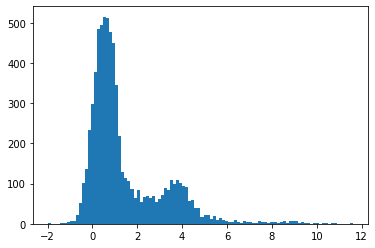

In [9]:
# let's group all these planets into buckets based on planet size and orbital period!
radii = np.array(planetary['koi_prad'])
plt.hist(np.log(radii), bins=100)

(array([  1.,   5.,   5.,   8.,  10.,  47.,  81.,  80.,  98.,  88., 153.,
         98., 146.,  85., 124., 119., 144., 140., 147., 176., 184., 200.,
        199., 209., 228., 218., 212., 186., 225., 237., 209., 216., 186.,
        193., 164., 154., 147., 125., 129., 129.,  96., 108.,  79.,  77.,
         93.,  72.,  79.,  75.,  66.,  69.,  80.,  77.,  53.,  78.,  52.,
        162.,  81.,  58.,  54.,  33.,   5.,   2.,   1.,   3.,   0.,   1.,
          2.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-1.41946841, -1.28752115, -1.1555739 , -1.02362664, -0.89167938,
        -0.75973213, -0.62778487, -0.49583761, -0.36389036, -0.2319431 ,
        -0.09999584,  0.03195141,  0.16389867,  0.29584593,  0.42779318,
         0.55974044,  0.6916877 ,  0.82363495,  0.95558221,  1.08752947,
         1.21947672,  1.35

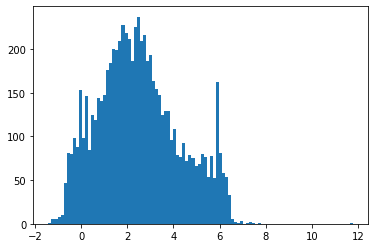

In [10]:
periods = np.array(planetary['koi_period'])
plt.hist(np.log(periods), bins=100)

Text(0, 0.5, 'Log-radius (ln Earth radii)')

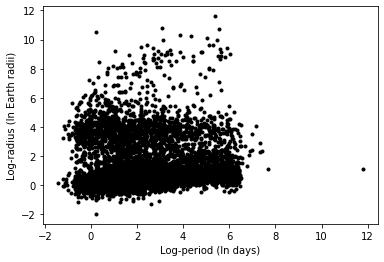

In [11]:
plt.plot(np.log(periods), np.log(radii), ".k")
plt.xlabel("Log-period (ln days)")
plt.ylabel("Log-radius (ln Earth radii)")

In [12]:
set(planetary['koi_disposition'].values)

{'CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE', 'NOT DISPOSITIONED'}

In [13]:
planetary = planetary[planetary['koi_disposition'] != "FALSE POSITIVE"]
combined = pd.merge(planetary, stellar, on="kepid")
rstars = combined['radius'].values 
mstars = combined['mass'].values
periods = combined['koi_period'].values
prads = combined['koi_prad'].values
eccs = combined['koi_eccen'].values

In [14]:
pgeoms = rstars / get_a(periods, mstars)

/Users/adityasengupta/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less_equal
  """Entry point for launching an IPython kernel.


5531

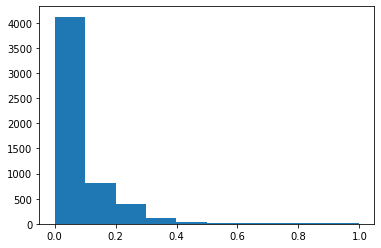

In [15]:
int(sum(plt.hist(pgeoms[(np.isfinite(pgeoms)) & (pgeoms <= 1.0)])[0]))

In [16]:
# these things should be an import from completeness.py
# except that this only uses pdet and not pwin

cdpp_cols = [k for k in stellar.keys() if k.startswith("rrmscdpp")]
cdpp_vals = np.array([k[-4:].replace("p", ".") for k in cdpp_cols], dtype=float)
pgam = gamma(4.65, loc=0., scale=0.98)
mesthres_cols = [k for k in stellar.keys() if k.startswith("mesthres")]
mesthres_vals = np.array([k[-4:].replace("p", ".") for k in mesthres_cols],
                         dtype=float)

def pcomp_combined(catalog):
    return pcomp_vectors(catalog, catalog['koi_period'].values, 
                         catalog['koi_prad'].values, catalog['koi_eccen'].values)

def pcomp_vectors(stars, periods, rp, eccs):
    '''
    Self-contained, returns pcomp over matched arrays of planets around stars.
    '''
    cdpp_cols = [k for k in stellar.keys() if k.startswith("rrmscdpp")]
    cdpp_vals = np.array([k[-4:].replace("p", ".") for k in cdpp_cols], dtype=float)
    pgam = gamma(4.65, loc=0., scale=0.98)
    mesthres_cols = [k for k in stellar.keys() if k.startswith("mesthres")]
    mesthres_vals = np.array([k[-4:].replace("p", ".") for k in mesthres_cols],
                            dtype=float)
    mstars = stars['mass'].values
    rstars = stars['radius'].values
    cdpp = stars[cdpp_cols].values
    dataspan = stars['dataspan'].values
    dutycycle = stars['dutycycle'].values
    mesthres_cols_stars = stars[mesthres_cols].values

    return pcomp_star_vectors(mstars, rstars, cdpp, dataspan, dutycycle, mesthres_cols_stars, periods, rp, eccs)

def pcomp_star_vectors(mstars, rstars, cdpp, dataspan, dutycycle, mesthres_cols_stars, periods, rp, eccs):
    c = 1.0874
    s = 1.0187
    Go4pi = 2945.4625385377644/(4*np.pi*np.pi)
    re = 0.009171
    aor = (Go4pi*periods*periods*mstars) ** (1./3) / rstars
    tau = 6 * periods * np.sqrt(1 - eccs**2) / aor

    # sigma = np.apply_along_axis(np.interp, 0, tau, cdpp_vals, cdpp)
    sigma = np.array([np.interp(tau[i], cdpp_vals, cdpp[i]) for i in range(len(tau))])
    # Compute the radius ratio and estimate the S/N.
    k = rp * re / rstars
    delta = 0.84 * k*k * (c + s*k)
    snr = delta * 1e6 / sigma

    # Scale by the estimated number of transits.
    ntrn = dataspan * dutycycle / periods
    mess = snr * np.sqrt(ntrn)
    mest = np.array([np.interp(tau[i], mesthres_vals, mesthres_cols_stars[i]) for i in range(len(tau))])
    x = mess - 4.1 - (mest - 7.1)
    pdets = pgam.cdf(x)
    
    return pdets #* pwins# * pgeom

In [21]:
planetary_params = np.vstack((planetary.koi_period.values, 
                              planetary.koi_prad.values, planetary.koi_eccen.values)).T

In [ ]:
pdet_ij = np.empty((len(planetary), len(stellar)))
for i, params in enumerate(tqdm(planetary_params, total=len(planetary))):
    pdet_ij[i] = pcomp_vectors(stellar, *params)

In [ ]:
np.save('../data/idem_pdets.npy', pdet_ij)